# 2. Exploratory Data Analysis

In [44]:
import os
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from PIL import Image
from IPython.display import display
import yaml

In [18]:
ROOT = Path(os.path.abspath('')).resolve().parents[0]
DATA = os.path.join(ROOT, "data")
FIGURES_PATH = os.path.join(ROOT, 'reports', 'figures')
INTERIM_DATA = os.path.join(DATA, "interim")

Let us look at the train data:

In [45]:
with open(os.path.join(INTERIM_DATA, "classes.yaml"), "r") as f:
    classes = yaml.safe_load(f)

classes

{1: 'glass', 2: 'paper', 3: 'cardboard', 4: 'plastic', 5: 'metal', 6: 'trash'}

In [4]:
df_train = pd.read_parquet(os.path.join(INTERIM_DATA, "df_train.parquet.gzip"))
df_train.head(10)

,image_name,class,class_idx,class_name,image_path
0,cardboard202.jpg,3,2,cardboard,/Users/vadim.sokoltsov/learning/bin-it-right/d...
1,paper472.jpg,2,1,paper,/Users/vadim.sokoltsov/learning/bin-it-right/d...
2,paper522.jpg,2,1,paper,/Users/vadim.sokoltsov/learning/bin-it-right/d...
3,glass189.jpg,1,0,glass,/Users/vadim.sokoltsov/learning/bin-it-right/d...
4,glass325.jpg,1,0,glass,/Users/vadim.sokoltsov/learning/bin-it-right/d...
5,metal63.jpg,5,4,metal,/Users/vadim.sokoltsov/learning/bin-it-right/d...
6,cardboard61.jpg,3,2,cardboard,/Users/vadim.sokoltsov/learning/bin-it-right/d...
7,trash50.jpg,6,5,trash,/Users/vadim.sokoltsov/learning/bin-it-right/d...
8,paper305.jpg,2,1,paper,/Users/vadim.sokoltsov/learning/bin-it-right/d...
9,paper199.jpg,2,1,paper,/Users/vadim.sokoltsov/learning/bin-it-right/d...


## Total size

In [21]:
print(f"Total images: {len(df_train)}")

Total images: 1768


## Distribution of classes of images

In [9]:
df_train['class'].value_counts()

class
2    403
1    354
4    347
3    287
5    286
6     91
Name: count, dtype: int64

## Classes distribution:

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_78527/737940718.py:1: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns_plot = sns.countplot(x='class', data=df_train, hue='class_name', palette=sns.color_palette("tab10"))
/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_78527/737940718.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


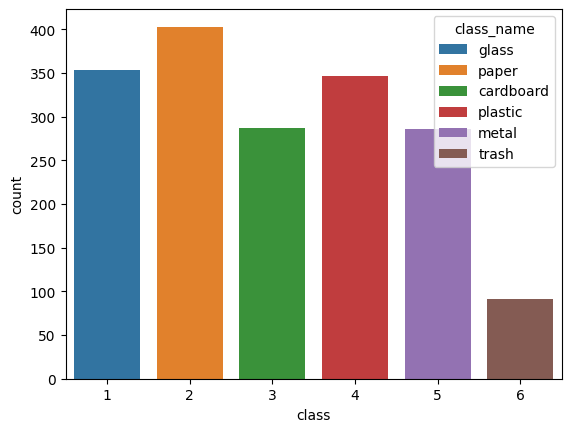

In [19]:
sns_plot = sns.countplot(x='class', data=df_train, hue='class_name', palette=sns.color_palette("tab10"))
fig = sns_plot.get_figure()
fig.savefig(os.path.join(FIGURES_PATH, 'eda_class_distribution.png'))
fig.show()

### Observations

* Class 6 (`trash`) has the smallest amount if elements in the training dataset.
  * This should be taken into account

## Images examples

glass


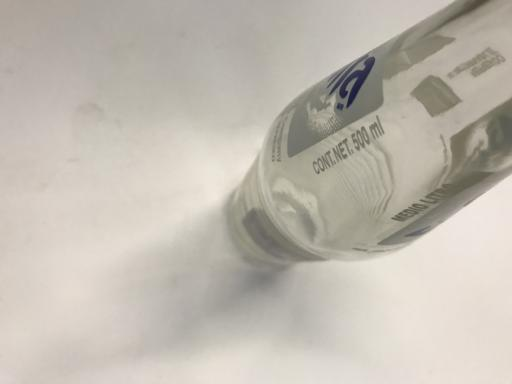

paper


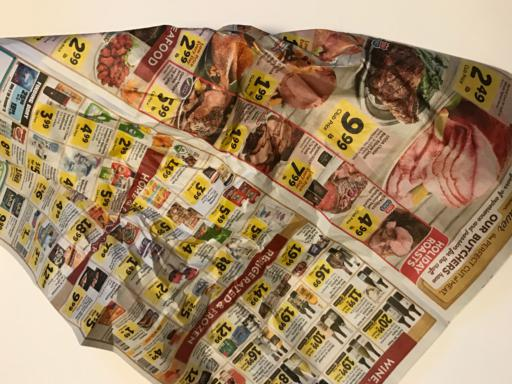

cardboard


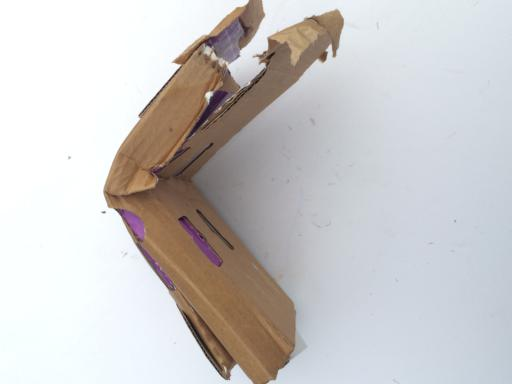

plastic


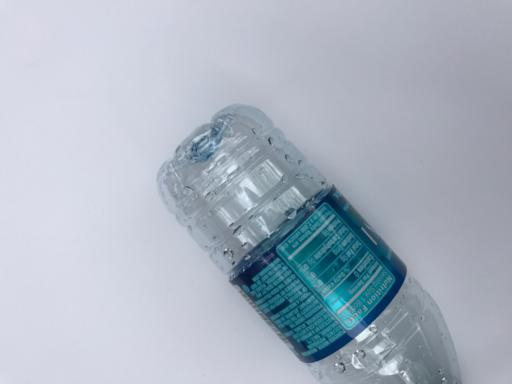

metal


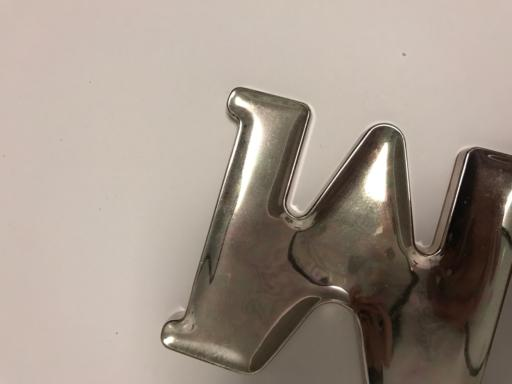

trash


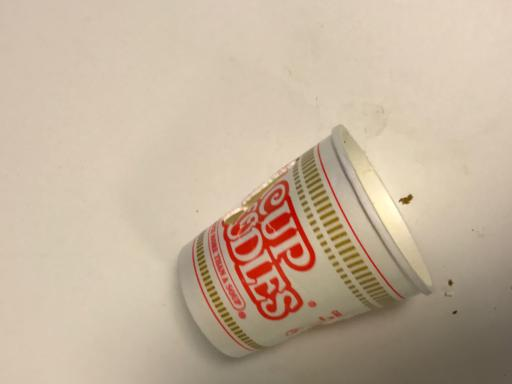

In [46]:
for key, value in classes.items():
    img_path = df_train[df_train['class'] == key].iloc[0]['image_path']
    img = Image.open(img_path)
    print(value)
    display(img)

### Observations

* Images are distinguishable from each other
* THe object on the image is distinguishable

## Image parameters

### Size

In [27]:
def get_size(path):
    with Image.open(path) as img:
        return img.size

def get_brightness(path):
    with Image.open(path).convert('L') as img:  # grayscale
        return np.array(img).mean()

In [29]:
sizes = df_train['image_path'].apply(get_size)
df_train['width'] = sizes.apply(lambda x: x[0])
df_train['height'] = sizes.apply(lambda x: x[1])
df_train['aspect'] = df_train['width'] / df_train['height']
df_train['brightness'] = df_train['image_path'].apply(get_brightness)

df_train

,image_name,class,class_idx,class_name,image_path,width,height,aspect,brightness
0,cardboard202.jpg,3,2,cardboard,/Users/vadim.sokoltsov/learning/bin-it-right/d...,512,384,1.333333,201.323451
1,paper472.jpg,2,1,paper,/Users/vadim.sokoltsov/learning/bin-it-right/d...,512,384,1.333333,144.707687
2,paper522.jpg,2,1,paper,/Users/vadim.sokoltsov/learning/bin-it-right/d...,512,384,1.333333,147.702983
3,glass189.jpg,1,0,glass,/Users/vadim.sokoltsov/learning/bin-it-right/d...,512,384,1.333333,186.760539
4,glass325.jpg,1,0,glass,/Users/vadim.sokoltsov/learning/bin-it-right/d...,512,384,1.333333,172.574305
...,...,...,...,...,...,...,...,...,...
1763,cardboard6.jpg,3,2,cardboard,/Users/vadim.sokoltsov/learning/bin-it-right/d...,512,384,1.333333,153.741501
1764,glass283.jpg,1,0,glass,/Users/vadim.sokoltsov/learning/bin-it-right/d...,512,384,1.333333,183.586578
1765,metal335.jpg,5,4,metal,/Users/vadim.sokoltsov/learning/bin-it-right/d...,512,384,1.333333,154.107213
1766,plastic133.jpg,4,3,plastic,/Users/vadim.sokoltsov/learning/bin-it-right/d...,512,384,1.333333,118.160233


### Brighteness

/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_78527/788900325.py:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns_plot = sns.barplot(x='brightness', data=birghtness_df, hue='class_name', palette=sns.color_palette("tab10"))
/var/folders/v0/8r5h4ym13fb_mzmqc1hfkt580000gn/T/ipykernel_78527/788900325.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


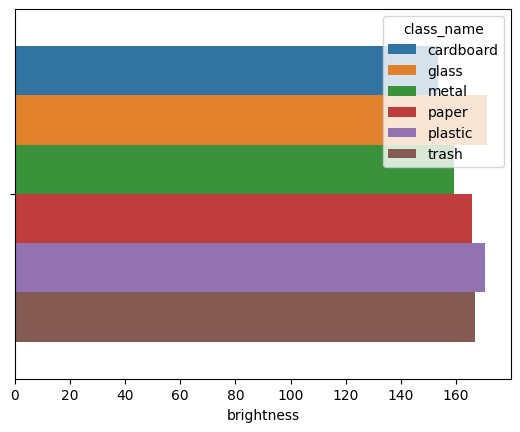

In [43]:
birghtness_df = df_train.groupby('class_name')['brightness'].agg('mean').to_frame().reset_index()
sns_plot = sns.barplot(x='brightness', data=birghtness_df, hue='class_name', palette=sns.color_palette("tab10"))
fig = sns_plot.get_figure()
fig.savefig(os.path.join(FIGURES_PATH, 'eda_brightness_class_distribution.png'))
fig.show()

In [30]:
df_train.groupby('class_name')['brightness'].describe()

,count,mean,std,min,25%,50%,75%,max
class_name,,,,,,,,
cardboard,287.0,153.481168,21.323949,81.087565,142.616155,153.183568,164.784081,217.895396
glass,354.0,171.332567,14.714544,97.067403,164.504087,172.608493,179.229342,213.815740
metal,286.0,159.172729,24.726039,77.998515,143.530950,160.756490,175.320272,220.758728
paper,403.0,165.759360,20.080404,90.900838,153.984436,170.198135,179.914378,206.010173
plastic,347.0,170.400266,14.084171,106.551498,166.192589,172.734136,177.958534,203.989909
trash,91.0,166.735959,17.096356,121.552424,156.284200,168.757996,179.763148,196.485291


### Observations

* All images ahve the same size
* The most bright images are for `plastic` class